<img src="Springboard_Logo.jpg" 
     align="right"
     style="width:150px; height:65px"/>

# **2015 US Domestic Flights Analysis: Delays and Cancellations (Capstone 2)**




<blank>

<p style='text-align: left;'> Iulia Tomescu (October, 2021)</p>

<a href="https://www.linkedin.com/in/iuliatomescu-m/" style="float:left"> Iulia's LinkedIn profile</a><br>
<a href="https://public.tableau.com/app/profile/iulia.tomescu" style="float:left"> Iulia's Tableau portfolio</a> <br>
<a href="https://www.springboard.com/" style="float:left"> Discover Sprinboard</a>




#### **General note**
>The goal of this Capstone2 project is multifold: **1)** to incorporate all the learnings (technical & analytical skills) acquired throughout the Data Analytics Career Track course offered by Springboard, **2)** to demonstrate & strengthen technical skills and computer literacy such as Python, Tableau, statistics, predictive analytics & modeling, **3)** generate a basic tutorial for people that are new to Python and Exploratory Data Analysis

#### **Acknowledgments**
>I would like to offer my thanks to my Springboard advisor Akshay Jhawar and all other mentors that gave me support throughout this project (Wayne Ang, Chris Hui, Chris Young)

#### **Python libraries used**

>* **Data manipulation**: numpy, pandas, geopandas
>* **Visualization**: matplotlib, seaborn
>* **Statistics**: statsmodel,scipy
>* **Modeling**:statsmodel, sklearn
---

### OUTLINE

I. <a href="#I.-Introduction">Introduction</a>

II. <a href="#II.-Exploratory-Data-Analysis-(EDA):-data-examination-&-cleaning">Exploratory Data Analysis (EDA): data examination & cleaning</a>

**A. Import python libraries & raw data<br>
B. Data overview & description: understanding the variables & dimensions<br>
C. Data cleaning**

III. <a href="#III.-Exploratory-Data-Analysis-(EDA):-visualization,-statistics-(descriptive-&-inferential),-trends-&-relationships">Exploratory data analysis (EDA): visualization, statistics (descriptive & inferential), trends  & relationships</a>

**A. EDA approach**<br>
**B. Analysis of cancellation, delayed flights, and frequency of flights**
1. 2015 Cancelled and Diverted flights overview
2. Flights frequency - Temporal analysis
3. Flight frequency - Spatial analysis
4. Flight frequency - Airlines (carrier) analysis
**C. Analysis of flight delays: frequency, magnitude, reasons, temporal, spatial and carrier -based analysis**
1. Understand the relationship between variables
2. Delays at departure vs. delays at arrival
3. Delays @ Departure (DD): frequency vs. magnitude
4. Flight delays distribution by reason
5. Flight delays carrier-based analysis
6. Flight delays temporal analysis
    

IV. <a href="#IV.-Predictive-Analytics:-Modeling-&-Prediction">Predictive Analytics: Modeling & Prediction for Delays at Departure</a>
1. Multivariate linear regression model_1: all Departure Delay data for 2015
2. Multivariate linear regression model_2: Departure Delays <= p99
3. Multivariate linear regression model_3: Departure Delays > p99

### I. Introduction

**Why this data set**

I chose this data set based of specific analysis targets I aimed to achieve:
* Rich in dimensions such as categorical, numerical data, geographic data, and time series
* Prediction potential
* High potential business impact
* Interesting subject

**Context**

* The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance and the causes of delays and cancellation of domestic flights operated by large air carriers since 2003. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report. It covers nonstop scheduled-service flights between points within the United States (including territories) by the fourteen (14) U.S. air carriers that have at least one percent of total domestic scheduled-service passenger revenues.

* The current analysis focuses on the 2015 historical daily data of domestic flights operated by large air carriers, which includes specs on airlines, flights, airports, dates, time, and causes of delays and cancellations

**Goals**

* Identify major drivers for delays and cancellations 
* Build a model to predict overall flight delays

**Sources**

* Kaggle: https://www.kaggle.com/usdot/flight-delays?select=flights.csv
    
* US Department of Transportation: https://www.transportation.gov/airconsumer

* Bureau of Transportation Statistics: https://www.transtats.bts.gov


### II. Exploratory Data Analysis (EDA): data examination & cleaning

**A. Import python libraries & raw data** <br>

**B. Data overview & description: understanding the variables & dimensions** <br>
1. The *flights* dataset<br>
2. The *airports* dataset<br>
3. The *airlines* dataset<br>
4. Renaming columns<br>
**C. Data cleaning (add link to section): unique identifiers, missing values, duplicates, data inconsistencies, transforming data**
1. The *flights* dataset<br>
2. The *airports* dataset<br>
3. Merging datasets<br>

---

#### **A. Import python libraries & raw data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import datetime
import time
import os

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20, 5)

#magic panda line that renders the figure in a notebook
%matplotlib inline

In [2]:
# import 4 files part of the data set
# 1. flights:  the main file
flights_raw=pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights.csv", low_memory=False)

# 2. airports file includes airport geographic coordinates
airports_raw=pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/airports.csv")

# 3. airlines file includes the airlines 2-letter code
airlines=pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/airlines.csv")

# 4. the Ocotber file includes data for the month of October 2015 only to correct the flights data set
October_2015_Flights=pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/October_2015_Flights.csv", low_memory=False)


In [52]:
# summary table
pd.concat([
    flights_raw.dtypes,
    flights_raw.count(),
    flights_raw.nunique(),
    flights_raw.duplicated().value_counts(),
    flights_raw.isnull().sum(),
    round(100 * flights_raw.isnull().sum() / len(flights_raw), 1)
],
          axis=1).rename(
              columns={
                  0: 'Dtype',
                  1: 'Non-null counts',
                  2: 'Unique values',
                  3: 'Duplicates',
                  4: 'Missing Nulls',
                  5: 'Missing (%)'
              })

,Dtype,Non-null counts,Unique values,Duplicates,Missing Nulls,Missing (%)
YEAR,int16,5819079.0,1.0,NaN,0.0,0.0
MONTH,int8,5819079.0,12.0,NaN,0.0,0.0
DAY,int8,5819079.0,31.0,NaN,0.0,0.0
DAY_OF_WEEK,int8,5819079.0,7.0,NaN,0.0,0.0
AIRLINE,category,5819079.0,14.0,NaN,0.0,0.0
ORIGIN_AIRPORT,object,5819079.0,628.0,NaN,0.0,0.0
DESTINATION_AIRPORT,object,5819079.0,629.0,NaN,0.0,0.0
SCHEDULED_DEPARTURE,float32,5819079.0,1321.0,NaN,0.0,0.0
DEPARTURE_TIME,float32,5732926.0,1440.0,NaN,86153.0,1.5
DEPARTURE_DELAY,float32,5732926.0,1217.0,NaN,86153.0,1.5


---
#####  <font color=blue> Optimize files for memory usage

In [4]:
flights_size = os.stat(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights.csv"
)
airports_size = os.stat(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/airports.csv"
)
airlines_size = os.stat(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/airlines.csv"
)
october_size = os.stat(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/October_2015_Flights.csv"
)

print('The size of "flights_raw" is:', round(flights_size.st_size / 1000000,
                                             2), "MB")
print('The size of "airports" is:', round(airports_size.st_size / 1000000, 2),
      "MB")
print('The size of "airlines" is:', round(airlines_size.st_size / 1000000, 2),
      "MB")
print('The size of "october" is:', round(october_size.st_size / 1000000, 2),
      "MB")

The size of "flights_raw" is: 592.41 MB
The size of "airports" is: 0.02 MB
The size of "airlines" is: 0.0 MB
The size of "october" is: 177.3 MB


In [5]:
# reducing the file memory usage by changind the dtypes
dtype = {'YEAR':'int16', 'MONTH':'int8', 'DAY':'int8', 'DAY_OF_WEEK':'int8', 'AIRLINE':'category', "SCHEDULED_DEPARTURE":'float32', 'DEPARTURE_TIME':'float32', 'DEPARTURE_DELAY':'float32', 'TAXI_OUT':'float32', 'WHEELS_OFF':'float32', 'SCHEDULED_TIME':'float32', 'ELAPSED_TIME':'float32', 'AIR_TIME':'float32', 'DISTANCE':'int16', 'WHEELS_ON':'float32', 'TAXI_IN':'float32', 'SCHEDULED_ARRIVAL':'float32', 'ARRIVAL_TIME':'float32', 'ARRIVAL_DELAY':'float32','DIVERTED':'int8', 'CANCELLED':'int8', 'CANCELLATION_REASON':'category', 'AIR_SYSTEM_DELAY':'float32', 'SECURITY_DELAY':'float32', 'AIRLINE_DELAY':'float32', 'LATE_AIRCRAFT_DELAY':'float32', 'WEATHER_DELAY':'float32'}
flights_raw = pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights.csv", low_memory=False, dtype=dtype)

#drop 2 columns
flights_raw=flights_raw.drop(columns=['FLIGHT_NUMBER', 'TAIL_NUMBER'])

#### **B. Data overview & description: understanding the variables & dimensions** 

In [6]:
#raw data summary
print("1. flights_df_dimensions:", flights_raw.shape)
print("2. airports_df_dimensions:",airports_raw.shape)
print("3. airlines_df_dimensions:",airlines.shape)
print("4. October_2015_df_dimensions:",October_2015_Flights.shape)

1. flights_df_dimensions: (5819079, 29)
2. airports_df_dimensions: (322, 7)
3. airlines_df_dimensions: (14, 2)
4. October_2015_df_dimensions: (486165, 65)


|#|File Name||Description||No. of columns|
|:-:|:-||:-||:-:|
|1.|**flights_raw**||• the main data set to be used in analysis||29|
|2.|**airports_raw**||• reference file for the airports; <br>• includes details for all airports such as name, city, state, & geographic coordinates; <br> • to be merged with flights||7|
|3.|**airlines**||• reference file for the airlines; <br>• includes the full names for all the airlines ||2|
|4.|**October_2015_Flights**||• details of all flights for the month of October 2015 (see below why); <br> • to be merged with flights||65

#####  <font color=blue>1. The "flights" dataset

In [7]:
#main table
flights_raw.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5.0,2354.0,-11.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10.0,2.0,-8.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20.0,18.0,-2.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20.0,15.0,-5.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25.0,24.0,-1.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<b> General comments</b>

- the date columns (YEAR, MONTH, DAY) need to be transformed into a single-column date format;
- the total number of airlines is 14;
- the total number of airports is 628 (origin) & 629 (destination);
- AIRLINE column represents a 2-letter unique identifier for the airlines (aka IATA_CODE);
- ORIGIN_AIRPORT & DESTINATION_AIRPORT list 3-letter unique identifiers for airports (aka IATA_CODE);
- the time is either integer or float; they will need to be transformed into integers & converted to time stamps;
- the completeness of the data is good for the time value columns of interest;the rows with null values will be dropped;
- only 1.5% of flights were cancelled during 2015;
- 18.3% of flights recorded delays during 2015.

<b> Major data dimensions </b>

- **CARRIER-BASED (Airlines):** an identification number assigned by US DOT to identify a unique domestic airline, represented by a 2-letter code and corresponding name; <font color=blue>Total = 14 airlines designated by the 2-letter code </font>;
- **SPATIAL (Airports):** ORIGIN_AIRPORT & DESTINATION_AIRPORT corresponding to each flight; a 3-letter code attributed by IATA to uniquely identify the airports; <font color=blue>Total = 322 airports designated by the 3-letter code</font>;
-**TEMPORAL / Date:** Year, Month, Day, Day of week; dates corresponding to the flights;
-**TEMPORAL / Time:**
    - real time expressed as **xx:yy (hour:minute)** format: schedule *vs.* actuals <br>
        * scheduled_departure
        * departure_time
        * scheduled_arrival
        * arrival_time
        * wheels_off
        * wheels_on
    - calculated time metrics **in minutes**: departure_delays, arrival delays, taxi_out, taxi_in, air time, elapsed time <br>
        * arrival_delay
        * departure_delay
        * taxi_in
        * taxi_out
        * scheduled_time
        * elapsed_time
        * air_time
-**On-time schedule performance metrics:** on-time *vs.* delayed *vs.* cancelled
- **Cancellation reasons:** 4 main causes (A, B, C, D) as defined by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics
    - A = Carrier caused
    - B = Weather
    - C = National Aviation System
    - D = Security
   
- **Delay reasons:** 5 reasons (E, F, G, H, I) as defined by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics; **delays are defined for flights with >=15 minutes**
    - E = Carrier caused
    - F = Weather
    - G = National Aviation System
    - H = Security
    - I = Late arriving aircraft

<b> Definitions</b>:

* **WHEELS_OFF** time = the time point that the aircraft's wheels leave the ground.
* **WHEELS_ON** time = the time point that the aircraft's wheels touch on the ground.
* **TAXI_OUT** Time = the time duration elapsed between departure from the origin airport gate and wheels off.
* **TAXI_IN** time = the time duration elapsed between wheels-on and gate arrival at the destination airport.
* **AIR_TIME** = the time duration between wheels_off and wheels_on time
* **SCHEDULED_TIME** = the time duration between scheduled arrival and scheduled departure

<b> Calculated metrics (minutes)</b>:
    
* **DEPARTURE_DELAY** = DEPARTURE_TIME - SCHEDULED_DEPARTURE
* **TAXI_OUT** = WHEELS_OFF - DEPARTURE_TIME
* **SCHEDULED_TIME** = SCHEDULED_ARRIVAL - SCHEDULED_DEPARTURE
* **AIR_TIME** = WHEELS_ON - WHEELS_OFF
* **ELAPSED_TIME** = AIR_TIME + TAXI_IN + TAXI_OUT
* **TAXI_IN** = ARRIVAL_TIME - WHEEL_ON
* **ARRIVAL_DELAY** = ARRIVAL_TIME - SCHEDULED_ARRIVAL

---

##### <font color=blue>2. The "*airports*" dataset

In [8]:
airports_raw.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [9]:
# summary table
pd.concat([airports_raw.dtypes,
           airports_raw.count(),
           airports_raw.nunique(),
           airports_raw.isnull().sum(),
           round(100 * airports_raw.isnull().sum()/len(airports_raw),1)], 
              axis=1).rename(columns={0:'Dtype',1:'Non-null counts',2:'Unique values',
                                      3:'Missing Nulls',4:'Missing (%)'})

,Dtype,Non-null counts,Unique values,Missing Nulls,Missing (%)
IATA_CODE,object,322,322,0,0.0
AIRPORT,object,322,322,0,0.0
CITY,object,322,308,0,0.0
STATE,object,322,54,0,0.0
COUNTRY,object,322,1,0,0.0
LATITUDE,float64,319,319,3,0.9
LONGITUDE,float64,319,319,3,0.9


<b> General comments </b>
- the total number of unique airports is 322 which is very different from the number of airports in the flights file; this needs to be investigated;
- 3 airports don't have lat and long coordinates;
- IATA_CODE represents the unique identifier for airports which corresponds to the ORIGIN_AIRPORT & DESTINATION_AIRPORT in the *flights* file;
- IATA_CODE for airports (3-letter unique identifier) not to be confused with IATA_CODE for airlines (2-letter unique identifier);
- for clarity I will rename the columns in the *flights* and *airports* files;
- the *flights* & *airport files* will be merged using IATA_CODE for airports

---

##### <font color=blue>3. The "*airlines*" dataset

In [10]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [11]:
pd.concat([airlines.dtypes,
           airlines.count(),
           airlines.nunique(),
           airlines.isnull().sum(),
           round(100 * airlines.isnull().sum()/len(airlines),1)], 
              axis=1).rename(columns={0:'Dtype',1:'Non-null counts',2:'Unique values',
                                      3:'Missing Nulls',4:'Missing (%)'})

,Dtype,Non-null counts,Unique values,Missing Nulls,Missing (%)
IATA_CODE,object,14,14,0,0.0
AIRLINE,object,14,14,0,0.0


<b> General comments</b>
- the total number of unique airlines is 14;
- IATA_CODE is for airlines (a 2-letter unique identifier);
- AIRLINE columns represents the name of the airline; not to be confused with AIRLINE column in the flights file which is actually is the IATA_CODE for the airlines.

---

##### <font color=blue>4. Renaming columns for consistency

In [12]:
# Renaming columns in the flights file
flights_new=flights_raw.rename(columns={"AIRLINE": "ARL_CODE", "ORIGIN_AIRPORT": "ORG_ARP_CODE",
                                        "DESTINATION_AIRPORT": "DST_ARP_CODE"})

# Renaming columns in the airports file
airports_new=airports_raw.rename(columns={"IATA_CODE": "ARP_CODE", "AIRPORT": "ARP_Name"})

# Renaming columns in the airline file
airlines_new=airlines.rename(columns={"IATA_CODE": "ARL_CODE", "AIRLINE": "ARL_Name"})

---

#### **C. Data cleaning** 

##### <font color=blue> 1. The "flights" dataset

###### 1.1. Converting the date variables (YEAR, MONTH, DAY) into a datetime format

In [13]:
# Convert Date to Datetime format
flights_new['Date'] = pd.to_datetime(flights_new[['YEAR','MONTH','DAY']])
flights_new.Date.head()

#adding the day & month name columns
flights_new['Day_name'] = flights_new['Date'].dt.day_name()
flights_new['Month_name']=flights_new['Date'].dt.month_name()

In [14]:
flights_new[['Date','Day_name','Month_name']].head()

,Date,Day_name,Month_name
0,2015-01-01,Thursday,January
1,2015-01-01,Thursday,January
2,2015-01-01,Thursday,January
3,2015-01-01,Thursday,January
4,2015-01-01,Thursday,January


###### 1.2. Converting the time variables to time stamps

In [15]:
# the columns to be converted
flights_new[['Date','SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']].head()

,Date,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,2015-01-01,5.0,2354.0,15.0,404.0,430.0,408.0
1,2015-01-01,10.0,2.0,14.0,737.0,750.0,741.0
2,2015-01-01,20.0,18.0,34.0,800.0,806.0,811.0
3,2015-01-01,20.0,15.0,30.0,748.0,805.0,756.0
4,2015-01-01,25.0,24.0,35.0,254.0,320.0,259.0


In [16]:
# Define function that convert the 'HHMM' values to time
def Format_Hoursmin(hours):
    if pd.isnull(hours):
        return np.nan
    else:
        if hours == 2400: hours = 0
        hours = "{0:04d}".format(int(hours))
        Hoursmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
        return Hoursmin
            

In [17]:
flights_new['SCHEDULED_DEPARTURE'] = flights_new['SCHEDULED_DEPARTURE'].apply(Format_Hoursmin)
flights_new['DEPARTURE_TIME'] = flights_new['DEPARTURE_TIME'].apply(Format_Hoursmin)
flights_new['SCHEDULED_ARRIVAL'] = flights_new['SCHEDULED_ARRIVAL'].apply(Format_Hoursmin)
flights_new['ARRIVAL_TIME'] = flights_new['ARRIVAL_TIME'].apply(Format_Hoursmin)
flights_new['WHEELS_OFF'] = flights_new['WHEELS_OFF'].apply(Format_Hoursmin)
flights_new['WHEELS_ON'] = flights_new['WHEELS_ON'].apply(Format_Hoursmin)

In [18]:
flights_new[['Date','SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']].head()

,Date,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,2015-01-01,00:05:00,23:54:00,00:15:00,04:04:00,04:30:00,04:08:00
1,2015-01-01,00:10:00,00:02:00,00:14:00,07:37:00,07:50:00,07:41:00
2,2015-01-01,00:20:00,00:18:00,00:34:00,08:00:00,08:06:00,08:11:00
3,2015-01-01,00:20:00,00:15:00,00:30:00,07:48:00,08:05:00,07:56:00
4,2015-01-01,00:25:00,00:24:00,00:35:00,02:54:00,03:20:00,02:59:00


In [19]:
# summary table
pd.concat([flights_new.dtypes,
           flights_new.count(),
           flights_new.nunique(),
           flights_new.isnull().sum(),
           round(100 * flights_new.isnull().sum()/len(flights_new),1)], 
              axis=1).rename(columns={0:'Dtype',1:'Non-null counts',2:'Unique values',3:'# Nulls',4:'Missing (%)'})

,Dtype,Non-null counts,Unique values,# Nulls,Missing (%)
YEAR,int16,5819079,1,0,0.0
MONTH,int8,5819079,12,0,0.0
DAY,int8,5819079,31,0,0.0
DAY_OF_WEEK,int8,5819079,7,0,0.0
ARL_CODE,category,5819079,14,0,0.0
ORG_ARP_CODE,object,5819079,628,0,0.0
DST_ARP_CODE,object,5819079,629,0,0.0
SCHEDULED_DEPARTURE,object,5819079,1321,0,0.0
DEPARTURE_TIME,object,5732926,1440,86153,1.5
DEPARTURE_DELAY,float32,5732926,1217,86153,1.5


###### 1.3. Investigating airport codes

In [20]:
# no. of airport codes in the flights file for the origin airports
flights_new["ORG_ARP_CODE"].nunique()

628

In [21]:
# no. of airport codes in the flights file for the destination airports
flights_new["DST_ARP_CODE"].nunique()

629

In [22]:
#a list with all airport codes
flights_new["ORG_ARP_CODE"].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

>💡**The airport codes are either a 3-letter or 5-digit code**

In [23]:
# create 2 new columns based on the length of data for the airport codes
flights_new["Len_ORG_ARP"]=flights_new["ORG_ARP_CODE"].str.len()
flights_new["Len_DST_ARP"]=flights_new["DST_ARP_CODE"].str.len()

In [24]:
flights_new["Len_ORG_ARP"].unique()

array([3, 5])

In [25]:
flights_new["Len_DST_ARP"].unique()

array([3, 5])

>💡 **Both columns have two unique values, 3 or 5; 3 corresponds to the 3-letter code and 5 corresponds to the 5-digit code**

In [26]:
# create a crosstab to investigate the occurrence patterns of the 2 string lengths (3 and 5)
pd.crosstab(flights_new['Month_name'],flights_new['Len_ORG_ARP'])

Len_ORG_ARP,3,5
Month_name,,
April,485151,0
August,510536,0
December,479230,0
February,429191,0
January,469968,0
July,520718,0
June,503897,0
March,504312,0
May,496993,0


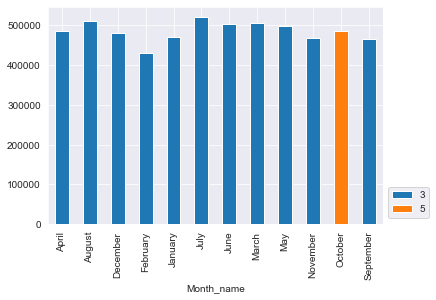

In [27]:
# when the 5-digit flights occur?
pd.crosstab(flights_new['Month_name'],flights_new['Len_ORG_ARP']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.1))

In [28]:
# create a crosstab to investigate the occurrence patterns of the 2 string lengths
pd.crosstab(flights_new['Month_name'],flights_new['Len_DST_ARP'])

Len_DST_ARP,3,5
Month_name,,
April,485151,0
August,510536,0
December,479230,0
February,429191,0
January,469968,0
July,520718,0
June,503897,0
March,504312,0
May,496993,0


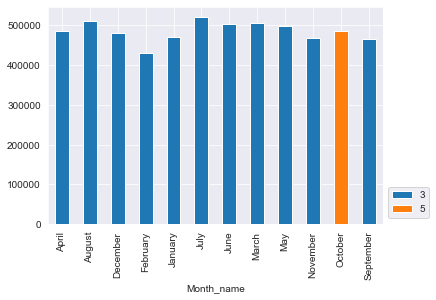

In [29]:
pd.crosstab(flights_new['Month_name'],flights_new['Len_DST_ARP']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.1))

>💡**We can see that the 5-digit airport codes, for both Origin and Destination airports, occur for the month of October only; all other months have a 3-letter code**

In [30]:
# subsetting the rows wiht 5-digit airport code
flights_5digit=flights_new[flights_new['Len_DST_ARP']==5]

# subsetting the rows wiht 3-digit airport code
flights_3digit=flights_new[flights_new['Len_DST_ARP']==3]

In [31]:
flights_new['ORG_ARP_CODE'].nunique(), flights_new['DST_ARP_CODE'].nunique()

(628, 629)

In [32]:
flights_5digit['ORG_ARP_CODE'].nunique()

306

In [33]:
flights_3digit['ORG_ARP_CODE'].nunique()

322

In [34]:
flights_5digit['DST_ARP_CODE'].nunique()

307

In [35]:
flights_3digit['DST_ARP_CODE'].nunique()

322

---

##### <font color=blue>2. The "airports" dataset

###### 2.1.  Investigating the codes for the airports

In [36]:
airports_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ARP_CODE   322 non-null    object 
 1   ARP_Name   322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [37]:
airports_new["ARP_CODE"].str.len().unique()

array([3])

>💡**the code for the airports is a 3-letter unique code and thus this dataset can be merged with the flights dataset based on this unique identifier**

###### 2.2.  Investigating the null values for the Lat & Long

In [38]:
# Lat & Long missing values
# method_1: display the airports that have NO coordinates (3 counts)
is_NaN = airports_new.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = airports_new[row_has_NaN]
print(rows_with_NaN)

    ARP_CODE                                           ARP_Name  \
96       ECP    Northwest Florida Beaches International Airport   
234      PBG                  Plattsburgh International Airport   
313      UST  Northeast Florida Regional Airport (St. August...   

              CITY STATE COUNTRY  LATITUDE  LONGITUDE  
96     Panama City    FL     USA       NaN        NaN  
234    Plattsburgh    NY     USA       NaN        NaN  
313  St. Augustine    FL     USA       NaN        NaN  


###### 2.3.  Replacing the null values

In [39]:
# replacing null values for coordinates that are missing
airports_new.iloc[[96],[5,6]] = [30.354673,-85.8000081697587]
airports_new.iloc[[234],[5,6]] = [44.6519299287931,-73.467855928325]
airports_new.iloc[[313],[5,6]] = [29.9545573,-81.34298816]
airports_new.iloc[[96,234,313]]

,ARP_CODE,ARP_Name,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,30.354673,-85.800008
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,44.651930,-73.467856
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,29.954557,-81.342988


---

##### <font color=blue>3. Merging datasets

###### 3.1.  Merging "flights" with "2015 October"

<font color=blue>
<b> Investigate the "October flights" dataset</b></font>

In [40]:
October_2015_Flights.shape

(486165, 65)

In [41]:
# display columns names
October_2015_Flights.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROU

>💡**we need 4 columns to correct the airport codes in the flights file:  1) ORIGIN_AIRPORT_ID, 2) ORIGIN,  3) DEST_AIRPORT_ID, 4) DEST**

<font color=blue>
<b> Correct the codes for the ORIGIN airport </b></font>

In [42]:
# create a df by extracting the codes for the Origin aiports from the October file
Oct_ORG = October_2015_Flights[['ORIGIN_AIRPORT_ID','ORIGIN']]

#dropping the duplicates
Oct_ORG = Oct_ORG.drop_duplicates()

# renaming the columns to match the columns in flights file
Oct_ORG.columns  = ['ORG_ARP_CODE', 'ORIGIN']

# converting the datatype to string to be able to join
Oct_ORG['ORG_ARP_CODE'] = Oct_ORG['ORG_ARP_CODE'].astype(str)

# converting the datatype to string to be able to join
flights_new['ORG_ARP_CODE']  = flights_new['ORG_ARP_CODE'].astype(str)

# merge files to correct the airports codes at Origin
flights_OCT = pd.merge(flights_new, Oct_ORG, on ='ORG_ARP_CODE', how='left')

# create a column with final 3-letter code for airports at Origin
flights_OCT['ORG_ARP_FINAL']   = np.where(flights_OCT['ORIGIN'].isnull(),flights_OCT['ORG_ARP_CODE'],flights_OCT['ORIGIN'])

<font color=blue>
<b> Correct the codes for the DESTINATION airport </b></font>

In [43]:
# create a df by extracting the codes for the Destination aiports from the October file
Oct_DST = October_2015_Flights[['DEST_AIRPORT_ID','DEST']]

#dropping the duplicates
Oct_DST = Oct_DST.drop_duplicates()

# renaming the columns to match the columns in flights file
Oct_DST.columns  = ['DST_ARP_CODE', 'DEST']

# converting the datatype to string to be able to join
Oct_DST['DST_ARP_CODE'] = Oct_DST['DST_ARP_CODE'].astype(str)

# converting the datatype to string to be able to join
flights_OCT['DST_ARP_CODE']  = flights_OCT['DST_ARP_CODE'].astype(str)

# merge files to correct the airports codes at Destination
flights_OCT_2 = pd.merge(flights_OCT, Oct_DST, on ='DST_ARP_CODE', how='left')

# create a column with final 3-letter code for airports at Destination
flights_OCT_2['DST_ARP_FINAL']   = np.where(flights_OCT_2['DEST'].isnull(),flights_OCT_2['DST_ARP_CODE'],flights_OCT_2['DEST'])

In [44]:
#drop unneccessary columns
flights_OCT_2=flights_OCT_2.drop(columns=['ORG_ARP_CODE','DST_ARP_CODE','Len_ORG_ARP','Len_DST_ARP','ORIGIN','DEST'])

In [45]:
flights_OCT_2.shape

(5819079, 32)

In [46]:
#summary table
pd.concat([flights_OCT_2.dtypes,
           flights_OCT_2.count(),
           flights_OCT_2.nunique(),
           flights_OCT_2.isnull().sum(),
           round(100 * flights_OCT_2.isnull().sum()/len(flights_OCT_2),1)], 
              axis=1).rename(columns={0:'Dtype',1:'Non-null counts',2:'Unique values',3:'Missing Nulls',4:'Missing (%)'})

,Dtype,Non-null counts,Unique values,Missing Nulls,Missing (%)
YEAR,int16,5819079,1,0,0.0
MONTH,int8,5819079,12,0,0.0
DAY,int8,5819079,31,0,0.0
DAY_OF_WEEK,int8,5819079,7,0,0.0
ARL_CODE,category,5819079,14,0,0.0
SCHEDULED_DEPARTURE,object,5819079,1321,0,0.0
DEPARTURE_TIME,object,5732926,1440,86153,1.5
DEPARTURE_DELAY,float32,5732926,1217,86153,1.5
TAXI_OUT,float32,5730032,184,89047,1.5
WHEELS_OFF,object,5730032,1440,89047,1.5


###### 3.2.  Merging "flights_OCT_2" with "airlines"

In [47]:
# merging with "airlines" to get the full name of the airlines
flights_OCT_airlines=flights_OCT_2.merge(airlines_new, on="ARL_CODE", how="left")
flights_OCT_airlines.shape

(5819079, 33)

###### 3.3.  Merging "flights_OCT_airlines" with "airports"

In [48]:
# merging with airports to get details on the ORIGIN airports
flights_OCT_ARL_ARP = flights_OCT_airlines.merge(airports_new, how = "left",
                                                 left_on = "ORG_ARP_FINAL", right_on = "ARP_CODE")

# merging with airports to get details on the DESTINATION airports
flights_FINAL= flights_OCT_ARL_ARP.merge(airports_new, how = "left",
                                         left_on = "DST_ARP_FINAL", right_on = "ARP_CODE", suffixes=('_org','_dst'))


In [49]:
# summary table of the FINAL file
pd.concat([flights_FINAL.dtypes,
           flights_FINAL.count(),
           flights_FINAL.nunique(),
           flights_FINAL.isnull().sum(),
           round(100 * flights_FINAL.isnull().sum()/len(flights_FINAL),1)], 
              axis=1).rename(columns={0:'Dtype',1:'Non-null counts',2:'Unique values',3:'# Nulls',4:'Missing (%)'})

,Dtype,Non-null counts,Unique values,# Nulls,Missing (%)
YEAR,int16,5819079,1,0,0.0
MONTH,int8,5819079,12,0,0.0
DAY,int8,5819079,31,0,0.0
DAY_OF_WEEK,int8,5819079,7,0,0.0
ARL_CODE,object,5819079,14,0,0.0
SCHEDULED_DEPARTURE,object,5819079,1321,0,0.0
DEPARTURE_TIME,object,5732926,1440,86153,1.5
DEPARTURE_DELAY,float32,5732926,1217,86153,1.5
TAXI_OUT,float32,5730032,184,89047,1.5
WHEELS_OFF,object,5730032,1440,89047,1.5


###### 3.4.  Export final file to a csv file

In [50]:
# export final file to a csv file
flights_FINAL.to_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights_FINAL.csv", index=False)